In [1]:
import pandas as pd
ortho = pd.read_csv('../data/ortho.csv')
para = pd.read_csv('../data/para.csv')

Text(0,0.5,'Which stimulus had higher contrast? (1 or 2)')

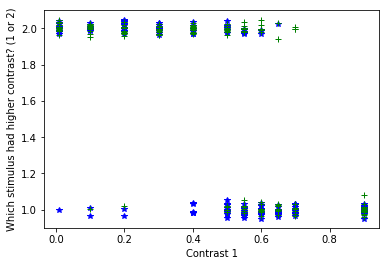

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(1)
# We apply a small vertical jitter to each point, just to show that there are
# multiple points at each location:
ax.plot(ortho['contrast1'], ortho['answer'] +
        np.random.randn(len(ortho)) * 0.02 , 'b*')
ax.plot(para['contrast1'], para['answer'] +
        np.random.randn(len(para)) * 0.02 , 'g+')
ax.set_ylim([0.9, 2.1])
ax.set_xlabel('Contrast 1')
ax.set_ylabel('Which stimulus had higher contrast? (1 or 2)')

In [3]:
fig.savefig('../img/figure1.png')

In [4]:
def transform_data(data):
    """
    Function that takes experimental data and gives us the dependent/independent
    variables for analysis

    Parameters
    ----------
    data : rec array
        The data with records: `contrast1`, `contrast2` and `answer`

    Returns
    -------
    x : The unique contrast differences.
    y : The proportion of '2' answers in each contrast difference
    n : The number of trials in each x,y condition
    """
    x = np.unique(data["contrast1"])
    y = []
    n = []

    for c in x:
        sub = data[data["contrast1"] == c]
        n.append(sub.shape[0])
        y.append(sum(sub["answer"] == 1) / n[-1])
    return x,y,n


In [5]:
x_ortho, y_ortho, n_ortho = transform_data(ortho)
x_para, y_para, n_para = transform_data(para)


/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


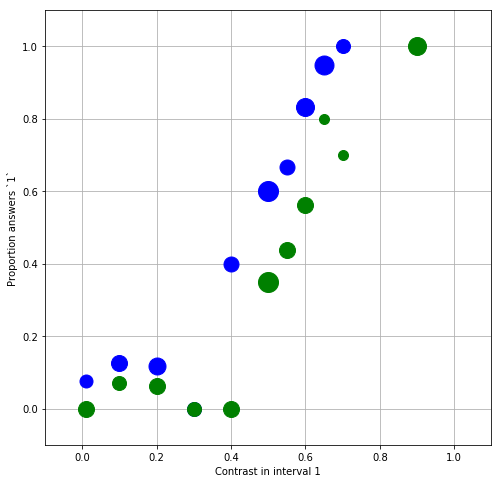

In [6]:
fig, ax = plt.subplots(1)
# To plot each point with size proportional to the number of trials in that condition:
for x,y,n in zip(x_ortho, y_ortho, n_ortho):
    ax.plot(x, y, 'bo', markersize=n)

for x,y,n in zip(x_para, y_para, n_para):
    ax.plot(x, y, 'go', markersize=n)

ax.set_xlabel('Contrast in interval 1')
ax.set_ylabel('Proportion answers `1`')
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-0.1, 1.1])
ax.grid('on')
fig.set_size_inches([8,8])


In [7]:
fig.savefig('../img/figure2.png')

In [8]:
np.polyfit(x_ortho, y_ortho, 1)

array([ 1.35193621, -0.07918802])

In [9]:
beta1_ortho, beta0_ortho = np.polyfit(x_ortho, y_ortho, 1)
beta1_para, beta0_para = np.polyfit(x_para, y_para, 1)


In [10]:
x = np.linspace(0, 1, 100)  # What does linspace do?
y_ortho_hat = np.polyval((beta1_ortho, beta0_ortho), x)
y_para_hat = np.polyval((beta1_para, beta0_para), x)


/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


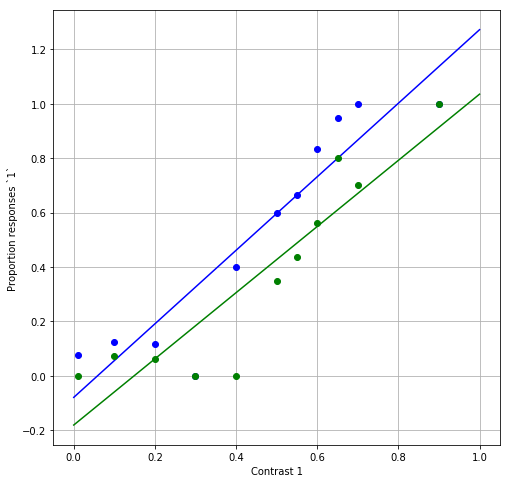

In [11]:
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat, 'b')
ax.plot(x_ortho, y_ortho, 'bo')
ax.plot(x, y_para_hat, 'g')
ax.plot(x_para, y_para, 'go')
ax.set_xlabel('Contrast 1')
ax.set_ylabel('Proportion responses `1`')
ax.grid('on')
fig.set_size_inches([8,8])


In [12]:
fig.savefig('../img/figure3.png')

In [13]:
pse_ortho = (0.5 - beta0_ortho)/beta1_ortho
pse_para = (0.5 - beta0_para)/beta1_para

/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


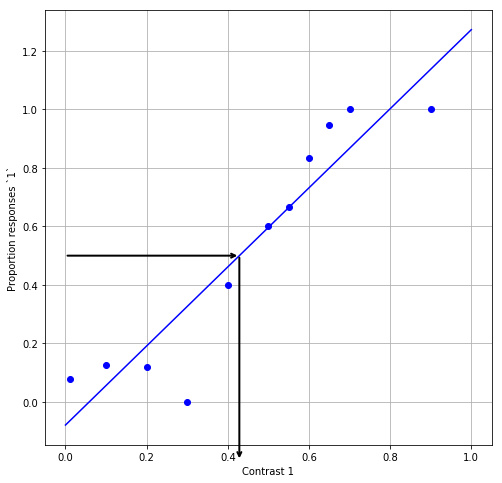

In [14]:
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat, 'b')
ax.plot(x_ortho, y_ortho, 'bo')


ax.set_xlabel('Contrast 1')
ax.set_ylabel('Proportion responses `1`')
ax.grid('on')

ax.annotate("",
            xy=(0, 0.5), xycoords='data',
            xytext=(pse_ortho, 0.5), textcoords='data',
            arrowprops=dict(arrowstyle="<-",linewidth=2,
                            connectionstyle="arc3"),
            )


ax.annotate("",
            xy=(pse_ortho, 0.5), xycoords='data',
            xytext=(pse_ortho, -0.2), textcoords='data',
            arrowprops=dict(arrowstyle="<-", linewidth=2,
                            connectionstyle="arc3"),
            )
fig.set_size_inches([8,8])
fig.savefig('../img/figure4.png')

/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


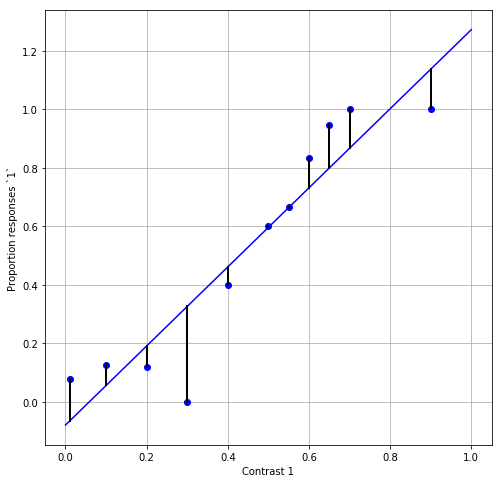

In [15]:
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat, 'b')
ax.plot(x_ortho, y_ortho, 'bo')
ax.set_xlabel('Contrast 1')
ax.set_ylabel('Proportion responses `1`')
ax.grid('on')
for xx, yy in zip(x_ortho, y_ortho):
    plt.plot([xx, xx], [yy, np.polyval((beta1_ortho, beta0_ortho), xx)], 'k', linewidth=2)

fig.set_size_inches([8,8])
fig.savefig('../img/figure5.png')

In [16]:
SSE_ortho = np.sum((y_ortho - np.polyval((beta1_ortho, beta0_ortho), x_ortho)) ** 2)
SSE_para = np.sum((y_para - np.polyval((beta1_para, beta0_para), x_para)) ** 2)

In [17]:
SSE_ortho, SSE_para

(0.2095271151678146, 0.22604100785582026)

In [18]:
from scipy import special
def cumgauss(x, mu, sigma):
    """
    The cumulative Gaussian at x, for the distribution with mean mu and
    standard deviation sigma.

    Parameters
    ----------
    x : float or array
       The values of x over which to evaluate the cumulative Gaussian function

    mu : float
       The mean parameter. Determines the x value at which the y value is 0.5

    sigma : float
       The variance parameter. Determines the slope of the curve at the point of
       Deflection

    Returns
    -------

    Notes
    -----
    Based on:
    http://en.wikipedia.org/wiki/Normal_distribution#Cumulative_distribution_function

    """
    return 0.5 * (1 + special.erf((x-mu)/(np.sqrt(2)*sigma)))

/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


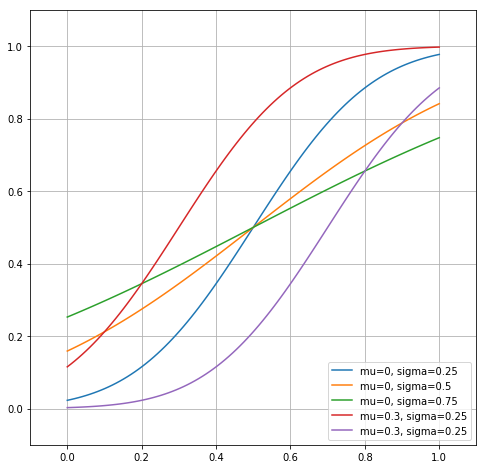

In [19]:
fig, ax = plt.subplots(1)
ax.plot(x, cumgauss(x, 0.5, 0.25), label='mu=0, sigma=0.25')
ax.plot(x, cumgauss(x, 0.5, 0.5), label='mu=0, sigma=0.5')
ax.plot(x, cumgauss(x, 0.5, 0.75), label='mu=0, sigma=0.75')
ax.plot(x, cumgauss(x, 0.3, 0.25), label='mu=0.3, sigma=0.25')
ax.plot(x, cumgauss(x, 0.7, 0.25), label='mu=0.3, sigma=0.25')
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-0.1, 1.1])
ax.grid('on')
fig.set_size_inches([8,8])
plt.legend(loc='lower right')


In [20]:
fig.savefig('../img/figure6.png')

In [21]:
import scipy.optimize as opt

In [22]:
params_ortho, cov_ortho = opt.curve_fit(cumgauss, x_ortho, y_ortho)
params_para, cov_ortho = opt.curve_fit(cumgauss, x_para, y_para)

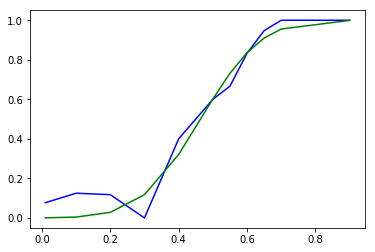

In [23]:
plt.plot(x_ortho, y_ortho, 'b')
plt.plot(x_ortho, cumgauss(x_ortho, *params_ortho), 'g')

In [24]:
SSE_ortho = np.sum((cumgauss(x_ortho, params_ortho[0], params_ortho[1]) - y_ortho) ** 2)
SSE_para = np.sum((cumgauss(x_para, params_para[0], params_para[1]) - y_para) ** 2)

In [25]:
SSE_ortho, SSE_para

(0.056134428101896935, 0.04555280346603433)

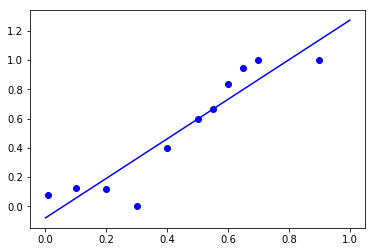

In [26]:
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat, 'b')
ax.plot(x_ortho, y_ortho, 'bo')

In [27]:
def weibull(x, threshx, slope, lower_asymp, upper_asymp):
    """ 
    The Weibull cumulative distribution function

    Parameters 
    ---------- 
    x : float or array
       The values of x over which to evaluate the cumulative Weibull function
    
    threshx : float
       The value of x at the deflection point of the function. 
       For a lower_asymp set to 0.5, this is at approximately y=0.81  
       
    slope : float
        The slope of the function at the deflection point. 
    
    lower_asymp : float
        The lower asymptote of the function
        
    upper_asymp : float 
        The upper asymptote of the function. 
    """
    threshy = 1 - (lower_asymp * np.exp(-1))
    k = (-np.log((1 - threshy) / (lower_asymp))) ** (1 / slope)
    foo = (lower_asymp + upper_asymp - 1) * np.exp(-(k * x / threshx) ** slope)
    return upper_asymp - foo

/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


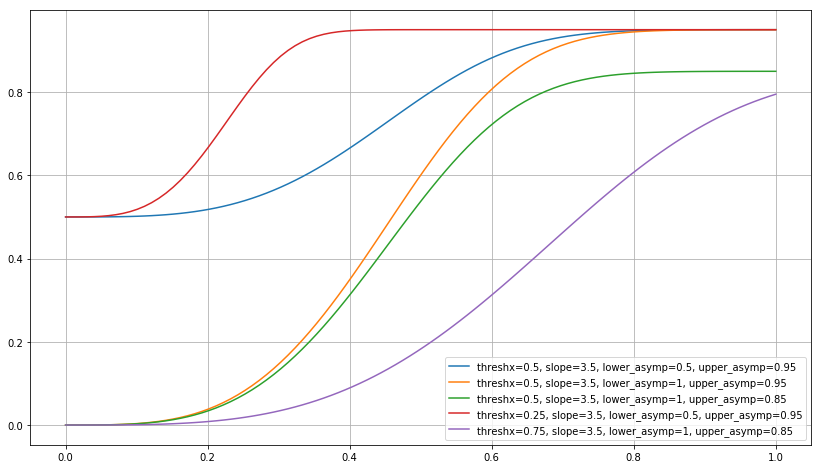

In [28]:
fig, ax = plt.subplots(1)
ax.plot(x, weibull(x, 0.5, 3.5, 0.5, 0.95), label='threshx=0.5, slope=3.5, lower_asymp=0.5, upper_asymp=0.95')
ax.plot(x, weibull(x, 0.5, 3.5, 1, 0.95),  label='threshx=0.5, slope=3.5, lower_asymp=1, upper_asymp=0.95')
ax.plot(x, weibull(x, 0.5, 3.5, 1, 0.85), label='threshx=0.5, slope=3.5, lower_asymp=1, upper_asymp=0.85')
ax.plot(x, weibull(x, 0.25, 3.5, 0.5, 0.95), label='threshx=0.25, slope=3.5, lower_asymp=0.5, upper_asymp=0.95')
ax.plot(x, weibull(x, 0.75, 3.5, 1, 0.85), label='threshx=0.75, slope=3.5, lower_asymp=1, upper_asymp=0.85')
ax.grid('on')
fig.set_size_inches([14, 8])
plt.legend(loc='lower right')


In [29]:
fig.savefig('../img/figure7.png')

In [30]:
params_ortho, cov_ortho = opt.curve_fit(weibull, x_ortho, y_ortho)
params_para, cov_para = opt.curve_fit(weibull, x_para, y_para)

/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in power


/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


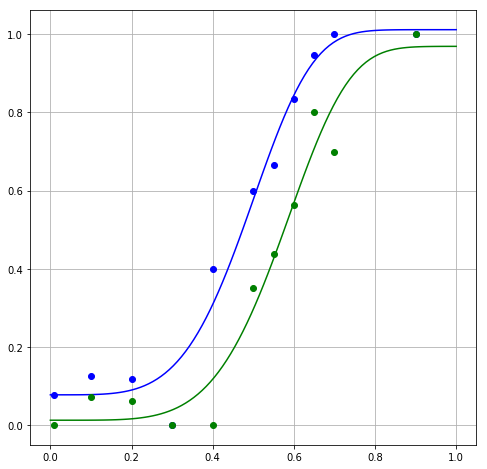

In [31]:
y_ortho_hat = weibull(x, params_ortho[0], params_ortho[1], params_ortho[2], params_ortho[3])
fig, ax = plt.subplots(1)
ax.plot(x, y_ortho_hat, 'b')
ax.plot(x_ortho, y_ortho, 'bo')

y_para_hat = weibull(x, params_para[0], params_para[1], params_para[2], params_para[3])
ax.plot(x, y_para_hat, 'g')
ax.plot(x_para, y_para, 'go')

ax.grid("on")
fig.set_size_inches([8, 8])

In [32]:
fig.savefig('../img/figure8.png')

In [33]:
SSE_para = np.sum((weibull(x_para, params_para[0], params_para[1], params_para[2], params_para[3]) - y_para) ** 2)
SSE_ortho = np.sum((weibull(x_ortho, params_ortho[0], params_ortho[1], params_ortho[2], params_ortho[3]) - y_ortho) ** 2)

In [34]:
SSE_para, SSE_ortho

(0.048653503169131536, 0.03783409500140696)

In [35]:
beta_ortho = np.polyfit(x_ortho, y_ortho, 6)
beta_para = np.polyfit(x_para, y_para, 6)


In [36]:
beta_ortho.shape

(7,)

In [37]:
SSE_ortho = np.sum((y_ortho - np.polyval(beta_ortho, x_ortho))**2)
SSE_para = np.sum((y_para - np.polyval(beta_para, x_para))**2)
print(SSE_ortho)
print(SSE_para)

0.025343091293325997
0.016410684735349214


/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


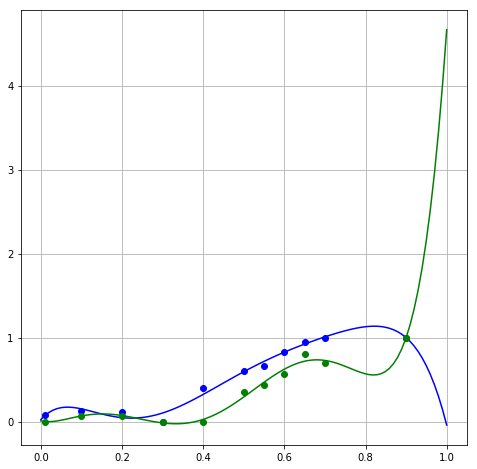

In [38]:

fig, ax = plt.subplots(1)
ax.plot(x, np.polyval(beta_ortho, x), 'b')
ax.plot(x_ortho, y_ortho, 'bo')
ax.plot(x, np.polyval(beta_para, x), 'g')
ax.plot(x_para, y_para, 'go')
ax.grid('on')
fig.set_size_inches([8,8])
fig.savefig('../img/figure9.png')


In [39]:
ortho_1 = ortho[::2]
x_ortho_1, y_ortho_1, n_ortho_1 = transform_data(ortho_1)

In [40]:
params_ortho_1, cov_ortho_1 = opt.curve_fit(cumgauss, x_ortho_1, y_ortho_1)

In [41]:
ortho_2 = ortho[1::2]
x_ortho_2, y_ortho_2, n_ortho_2 = transform_data(ortho_2)

In [42]:
SSE_ortho_2 = np.sum((cumgauss(x_ortho_2, params_ortho_1[0], params_ortho_1[1]) - y_ortho_2) ** 2)


In [43]:
SSE_ortho

0.025343091293325997

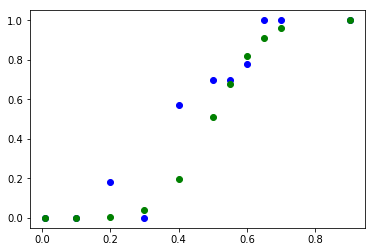

In [44]:
plt.plot(x_ortho_2, y_ortho_2, 'bo')
plt.plot(x_ortho_2, cumgauss(x_ortho_2, *params_ortho_1), 'go')

In [45]:
params_ortho_2, cov_ortho_2 = opt.curve_fit(cumgauss, x_ortho_2, y_ortho_2)
SSE_ortho_1 = np.sum((cumgauss(x_ortho_1, params_ortho_2[0], params_ortho_2[1]) - y_ortho_1) ** 2)


In [46]:
np.mean([SSE_ortho_1, SSE_ortho_2])

0.2047710235928591

In [47]:
para_1 = para[::2]
x_para_1, y_para_1, n_para_1 = transform_data(para_1)

In [48]:
para_2 = para[1::2]
x_para_2, y_para_2, n_para_2 = transform_data(para_2)

In [49]:
params_para_2, cov_para_2 = opt.curve_fit(cumgauss, x_para_2, y_para_2)
SSE_para_1 = np.sum((cumgauss(x_para_1, params_para_2[0], params_para_2[1]) - y_para_1) ** 2)


In [50]:
params_para_1, cov_para_1 = opt.curve_fit(cumgauss, x_para_1, y_para_1)
SSE_para_2 = np.sum((cumgauss(x_para_2, params_para_1[0], params_para_1[1]) - y_para_2) ** 2)


In [51]:
np.mean([SSE_ortho_1, SSE_ortho_2, SSE_para_1, SSE_para_2])

0.15748674944352342

In [52]:
params_para_2, cov_para_2 = opt.curve_fit(weibull, x_para_2, y_para_2)
SSE_para_1 = np.sum((weibull(x_para_1, *params_para_2) - y_para_1) ** 2)

params_para_1, cov_para_1 = opt.curve_fit(weibull, x_para_1, y_para_1)
SSE_para_2 = np.sum((weibull(x_para_2, *params_para_1) - y_para_2) ** 2)


In [53]:
params_ortho_2, cov_ortho_2 = opt.curve_fit(weibull, x_ortho_2, y_ortho_2)
SSE_ortho_1 = np.sum((weibull(x_ortho_1, *params_ortho_2) - y_ortho_1) ** 2)

params_ortho_1, cov_ortho_1 = opt.curve_fit(weibull, x_ortho_1, y_ortho_1)
SSE_ortho_2 = np.sum((weibull(x_ortho_2, *params_ortho_1) - y_ortho_2) ** 2)


/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in power


In [54]:
np.mean([SSE_ortho_1, SSE_ortho_2, SSE_para_1, SSE_para_2])

0.1792842088914225

/Users/arokem/.virtualenvs/scipy-optimize-paper/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


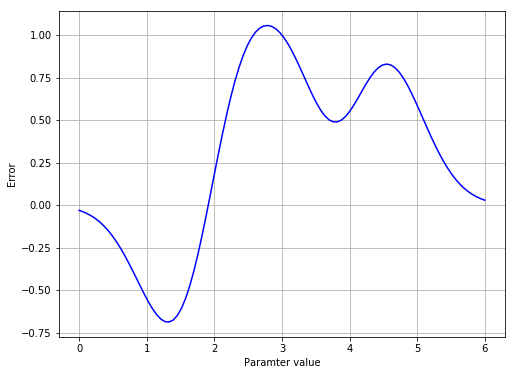

In [55]:
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1)
y = (1 - x/2 + x**5) * np.exp(-(x**2))
ax.plot(x+3, y, 'b')
ax.set_xlabel("Paramter value")
ax.set_ylabel("Error")
ax.grid("on")
fig.set_size_inches([8, 6])
fig.savefig('../img/figure10.png')

In [56]:
opt.curve_fit?